**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_survey2.csv')

In [3]:
df.head()

,Unnamed: 0,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Cleaned_Gender,no_employees
0,0,37,No,No,Yes,Often,No,Yes,Yes,Not sure,...,No,No,Some of them,Yes,No,Maybe,Yes,No,Female,15
1,1,44,No,No,No,Rarely,No,No,Don't know,No,...,Maybe,No,No,No,No,No,Don't know,No,Male,1000
2,2,32,No,No,No,Rarely,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,Male,15
3,3,31,Yes,Yes,Yes,Often,No,Yes,No,Yes,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male,63
4,4,31,Yes,No,No,Never,Yes,Yes,Yes,No,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male,300


In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Cleaned_Gender',
       'no_employees'],
      dtype='object')

In [5]:
df=df[df['tech_company']=='Yes']

In [6]:
df.drop(['Unnamed: 0', 'Age', 'self_employed',
       'tech_company',

        'phys_health_consequence',
       'phys_health_interview',
         'Cleaned_Gender',
       'no_employees'],axis=1,inplace=True)

/tmp/ipython-input-2091483221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0', 'Age', 'self_employed',


**mapping numerical values to binary columns**

In [7]:
binary={'Yes':1,'No':0}
for col in df.columns:
  unique_vals=df[col].unique()
  if set(unique_vals).issubset({'Yes','No'}):
    df[col]=df[col].map(binary)

/tmp/ipython-input-686433152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].map(binary)
/tmp/ipython-input-686433152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].map(binary)
/tmp/ipython-input-686433152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [8]:
df

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,0,1,Often,0,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Yes,0
2,0,0,Rarely,0,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,Yes,No,0
3,1,1,Often,0,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,No,1
4,0,0,Never,1,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know,0
5,1,0,Sometimes,0,Yes,Not sure,No,Don't know,Don't know,Don't know,No,Yes,Yes,No,Don't know,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1,1,Sometimes,1,Yes,Yes,Yes,No,Yes,Don't know,Yes,Some of them,No,No,No,0
1254,0,1,Dont know,0,No,No,No,No,Don't know,Somewhat easy,No,Some of them,Some of them,No,Don't know,0
1255,1,1,Often,1,Yes,Yes,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,Yes,0
1256,1,1,Sometimes,0,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,0


In [9]:
df['obs_consequence']=df['obs_consequence'].apply(lambda x : 1-x)

In [10]:
df

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,0,1,Often,0,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Yes,1
2,0,0,Rarely,0,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,Yes,No,1
3,1,1,Often,0,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,No,0
4,0,0,Never,1,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know,1
5,1,0,Sometimes,0,Yes,Not sure,No,Don't know,Don't know,Don't know,No,Yes,Yes,No,Don't know,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1,1,Sometimes,1,Yes,Yes,Yes,No,Yes,Don't know,Yes,Some of them,No,No,No,1
1254,0,1,Dont know,0,No,No,No,No,Don't know,Somewhat easy,No,Some of them,Some of them,No,Don't know,1
1255,1,1,Often,1,Yes,Yes,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,Yes,1
1256,1,1,Sometimes,0,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,1


In [11]:
df['mental_health_consequence'].value_counts()

,count
mental_health_consequence,
No,430
Maybe,376
Yes,225


In [12]:
mental_health_consequence_map={'No':1,'Maybe':0.5,'Yes':0}

In [13]:
df['mental_health_consequence']=df['mental_health_consequence'].map(mental_health_consequence_map)

In [14]:
extended_map={'Yes':1,'No':0,"Don't know":0.5,"Not sure":0.5,'Maybe':0.5,'Some of them':0.5 }

In [15]:
for col in df.columns:
  unique_vals=df[col].unique()
  if set(unique_vals).issubset({'Yes','No',"Don't know",'Not sure','Maybe','Some of them'}):
    df[col]=df[col].map(extended_map)

In [16]:
df

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,0,1,Often,0,1.0,0.5,0.0,1.0,1.0,Somewhat easy,1.0,0.5,1.0,0.0,1.0,1
2,0,0,Rarely,0,0.0,0.0,0.0,0.0,0.5,Somewhat difficult,1.0,1.0,1.0,1.0,0.0,1
3,1,1,Often,0,0.0,1.0,0.0,0.0,0.0,Somewhat difficult,0.0,0.5,0.0,0.5,0.0,0
4,0,0,Never,1,1.0,0.0,0.5,0.5,0.5,Don't know,1.0,0.5,1.0,1.0,0.5,1
5,1,0,Sometimes,0,1.0,0.5,0.0,0.5,0.5,Don't know,1.0,1.0,1.0,0.0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1,1,Sometimes,1,1.0,1.0,1.0,0.0,1.0,Don't know,0.0,0.5,0.0,0.0,0.0,1
1254,0,1,Dont know,0,0.0,0.0,0.0,0.0,0.5,Somewhat easy,1.0,0.5,0.5,0.0,0.5,1
1255,1,1,Often,1,1.0,1.0,0.0,0.0,1.0,Somewhat difficult,1.0,0.5,1.0,0.0,1.0,1
1256,1,1,Sometimes,0,1.0,1.0,0.0,0.0,0.5,Somewhat difficult,0.0,0.0,0.0,0.0,0.0,1


In [17]:
df['leave'].unique()

array(['Somewhat easy', 'Somewhat difficult', "Don't know",
       'Very difficult', 'Very easy'], dtype=object)

In [18]:
leave_mapping={'Somewhat easy':0.75, 'Somewhat difficult':0.5, "Don't know":0.5,
       'Very difficult':0.0, 'Very easy':1.0}



In [19]:
df['leave']=df['leave'].map(leave_mapping)

In [20]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'Dont know'], dtype=object)

In [21]:
work_interfere_map = {
    'Often': 1.0,
    'Sometimes': 0.75,
    'Rarely': 0.5,
    'Never': 0.25,
    'Dont know': 0.0
}

In [22]:
df['work_interfere']=df['work_interfere'].map(work_interfere_map)

In [23]:
df

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,0,1,1.00,0,1.0,0.5,0.0,1.0,1.0,0.75,1.0,0.5,1.0,0.0,1.0,1
2,0,0,0.50,0,0.0,0.0,0.0,0.0,0.5,0.50,1.0,1.0,1.0,1.0,0.0,1
3,1,1,1.00,0,0.0,1.0,0.0,0.0,0.0,0.50,0.0,0.5,0.0,0.5,0.0,0
4,0,0,0.25,1,1.0,0.0,0.5,0.5,0.5,0.50,1.0,0.5,1.0,1.0,0.5,1
5,1,0,0.75,0,1.0,0.5,0.0,0.5,0.5,0.50,1.0,1.0,1.0,0.0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1,1,0.75,1,1.0,1.0,1.0,0.0,1.0,0.50,0.0,0.5,0.0,0.0,0.0,1
1254,0,1,0.00,0,0.0,0.0,0.0,0.0,0.5,0.75,1.0,0.5,0.5,0.0,0.5,1
1255,1,1,1.00,1,1.0,1.0,0.0,0.0,1.0,0.50,1.0,0.5,1.0,0.0,1.0,1
1256,1,1,0.75,0,1.0,1.0,0.0,0.0,0.5,0.50,0.0,0.0,0.0,0.0,0.0,1


In [24]:
df['employer_score']=df[['benefits','care_options','wellness_program','seek_help','coworkers','supervisor','anonymity','leave','mental_vs_physical','obs_consequence']].mean(axis=1)

In [25]:
df.drop(columns=['benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_vs_physical','obs_consequence'],axis=1,inplace=True)

In [26]:
df

,family_history,treatment,work_interfere,remote_work,mental_health_consequence,coworkers,supervisor,mental_health_interview,employer_score
0,0,1,1.00,0,1.0,0.5,1.0,0.0,0.775
2,0,0,0.50,0,1.0,1.0,1.0,1.0,0.400
3,1,1,1.00,0,0.0,0.5,0.0,0.5,0.200
4,0,0,0.25,1,1.0,0.5,1.0,1.0,0.600
5,1,0,0.75,0,1.0,1.0,1.0,0.0,0.650
...,...,...,...,...,...,...,...,...,...
1252,1,1,0.75,1,0.0,0.5,0.0,0.0,0.600
1254,0,1,0.00,0,1.0,0.5,0.5,0.0,0.375
1255,1,1,1.00,1,1.0,0.5,1.0,0.0,0.700
1256,1,1,0.75,0,0.0,0.0,0.0,0.0,0.400


In [27]:
df['op_employer_score']=df[['mental_health_consequence','mental_health_interview']].mean(axis=1)

In [28]:
df.drop(['mental_health_consequence','mental_health_interview'],axis=1,inplace=True)

In [29]:
df

,family_history,treatment,work_interfere,remote_work,coworkers,supervisor,employer_score,op_employer_score
0,0,1,1.00,0,0.5,1.0,0.775,0.50
2,0,0,0.50,0,1.0,1.0,0.400,1.00
3,1,1,1.00,0,0.5,0.0,0.200,0.25
4,0,0,0.25,1,0.5,1.0,0.600,1.00
5,1,0,0.75,0,1.0,1.0,0.650,0.50
...,...,...,...,...,...,...,...,...
1252,1,1,0.75,1,0.5,0.0,0.600,0.00
1254,0,1,0.00,0,0.5,0.5,0.375,0.50
1255,1,1,1.00,1,0.5,1.0,0.700,0.50
1256,1,1,0.75,0,0.0,0.0,0.400,0.00


In [30]:
from sklearn.preprocessing import StandardScaler
numerical_features=['family_history','treatment','work_interfere','remote_work','employer_score','op_employer_score']
scaler=StandardScaler()
df_scaled=df.copy()
df_scaled[numerical_features]=scaler.fit_transform(df_scaled[numerical_features])

In [31]:
df_scaled.head()

,family_history,treatment,work_interfere,remote_work,coworkers,supervisor,employer_score,op_employer_score
0,-0.783236,1.002914,1.478542,-0.696843,0.5,1.0,1.369012,0.521729
2,-0.783236,-0.997094,-0.002154,-0.696843,1.0,1.0,-0.655832,2.429185
3,1.276754,1.002914,1.478542,-0.696843,0.5,0.0,-1.735749,-0.431999
4,-0.783236,-0.997094,-0.742502,1.435043,0.5,1.0,0.424085,2.429185
5,1.276754,-0.997094,0.738194,-0.696843,1.0,1.0,0.694064,0.521729


In [32]:
df.corr()

,family_history,treatment,work_interfere,remote_work,coworkers,supervisor,employer_score,op_employer_score
family_history,1.000000,0.389903,0.348896,0.020736,0.023358,0.018946,0.039516,-0.084913
treatment,0.389903,1.000000,0.652750,0.037180,0.093408,-0.035260,0.079289,-0.118075
work_interfere,0.348896,0.652750,1.000000,0.052080,0.017314,-0.102510,-0.049105,-0.195431
remote_work,0.020736,0.037180,0.052080,1.000000,0.076229,0.023176,0.008296,0.032250
coworkers,0.023358,0.093408,0.017314,0.076229,1.000000,0.586840,0.432020,0.488211
supervisor,0.018946,-0.035260,-0.102510,0.023176,0.586840,1.000000,0.544046,0.602597
employer_score,0.039516,0.079289,-0.049105,0.008296,0.432020,0.544046,1.000000,0.474032
op_employer_score,-0.084913,-0.118075,-0.195431,0.032250,0.488211,0.602597,0.474032,1.000000


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap.umap_ as umap

In [34]:
x_scaled=scaler.fit_transform(df)

In [35]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(x_scaled)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [36]:
K_range = range(2, 20)
sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_umap)
    score = silhouette_score(X_umap, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.4253
Silhouette Score for k=3: 0.4812
Silhouette Score for k=4: 0.6056
Silhouette Score for k=5: 0.6652
Silhouette Score for k=6: 0.6419
Silhouette Score for k=7: 0.6814
Silhouette Score for k=8: 0.7034
Silhouette Score for k=9: 0.7084
Silhouette Score for k=10: 0.7076
Silhouette Score for k=11: 0.6919
Silhouette Score for k=12: 0.6944
Silhouette Score for k=13: 0.6907
Silhouette Score for k=14: 0.7173
Silhouette Score for k=15: 0.7047
Silhouette Score for k=16: 0.6683
Silhouette Score for k=17: 0.6552
Silhouette Score for k=18: 0.6315
Silhouette Score for k=19: 0.6089


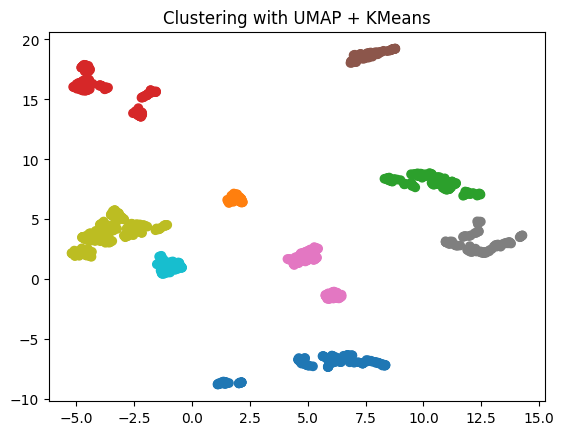

In [37]:
kmeans = KMeans(n_clusters=9, random_state=42)
labels_kmeans = kmeans.fit_predict(X_umap)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_kmeans, cmap='tab10')
plt.title("Clustering with UMAP + KMeans")
plt.show()

**Agglomerative Clustering**

In [38]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [39]:
agg = AgglomerativeClustering(n_clusters=9, linkage='ward')
labels = agg.fit_predict(X_umap)

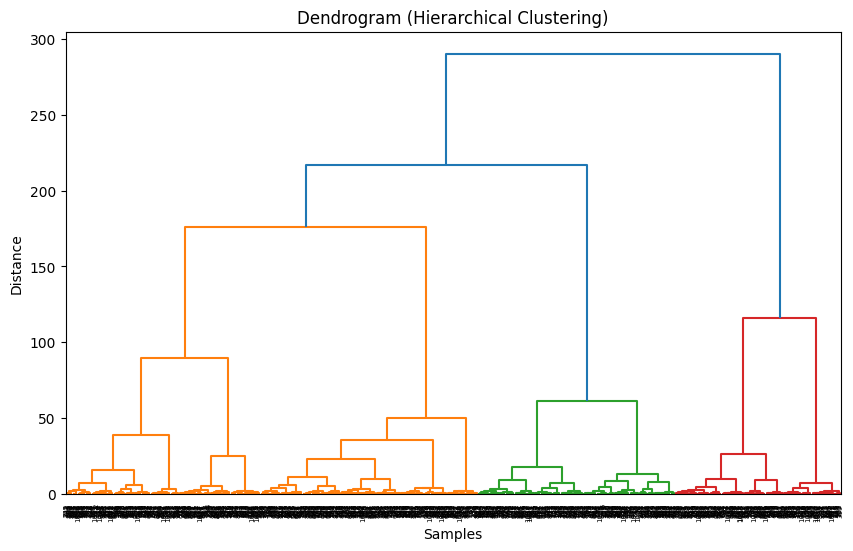

In [40]:
linked = linkage(X_umap, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

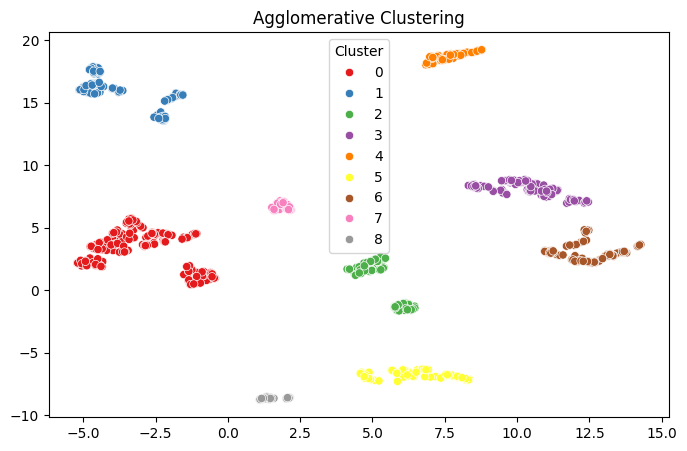

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='Set1')
plt.title("Agglomerative Clustering")
plt.legend(title='Cluster')
plt.show()

DBSCAN

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
db = DBSCAN(eps=1.4, min_samples=9)
labels = db.fit_predict(X_umap)

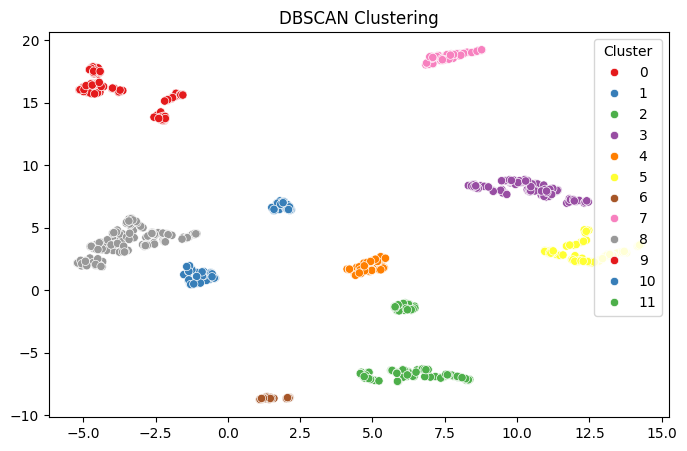

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='Set1')
plt.title("DBSCAN Clustering")
plt.legend(title='Cluster')
plt.show()

**grid search cv for better values of eps and minsamples**

In [45]:
best_score = -1
best_params = {}

In [46]:
for eps in np.arange(0.1, 1.5, 0.1):
    for min_samples in range(3, 10):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_umap)

In [47]:
if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(X_umap, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}


In [48]:

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)

Best Silhouette Score: 0.7216708
Best Parameters: {'eps': np.float64(1.4000000000000001), 'min_samples': 9}


**Checking which column contributes to clusters more**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
labels_kmeans

array([3, 1, 0, ..., 6, 5, 2], dtype=int32)

In [51]:
x_scaled_df = pd.DataFrame(x_scaled, columns=df.columns)

In [52]:
x_scaled_df['cluster'] = labels_kmeans

In [53]:
cluster_feature_importance = {}

for cluster_id in sorted(x_scaled_df['cluster'].unique()):

    y_binary = (x_scaled_df['cluster'] == cluster_id).astype(int)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(x_scaled_df.drop(columns='cluster'), y_binary)


    importances = pd.Series(clf.feature_importances_, index=x_scaled_df.columns[:-1])
    importances = importances.sort_values(ascending=False)
    cluster_feature_importance[cluster_id] = importances

In [54]:
for cluster_id, importance in cluster_feature_importance.items():
    print(f"\nTop features for Cluster {cluster_id}")
    print(importance.head(5))


Top features for Cluster 0
family_history    0.344687
remote_work       0.256369
treatment         0.162085
coworkers         0.103741
work_interfere    0.055772
dtype: float64

Top features for Cluster 1
coworkers         0.370439
remote_work       0.198996
treatment         0.132326
family_history    0.086207
employer_score    0.080501
dtype: float64

Top features for Cluster 2
remote_work       0.547373
treatment         0.193033
work_interfere    0.099994
family_history    0.070633
employer_score    0.046123
dtype: float64

Top features for Cluster 3
family_history    0.362909
treatment         0.277577
remote_work       0.227294
work_interfere    0.055359
employer_score    0.041131
dtype: float64

Top features for Cluster 4
remote_work       0.342869
family_history    0.276438
treatment         0.194512
employer_score    0.063524
work_interfere    0.062039
dtype: float64

Top features for Cluster 5
family_history    0.359990
treatment         0.162119
coworkers         0.142003
r

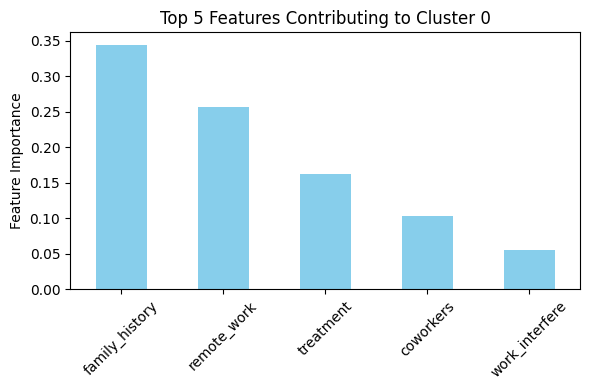

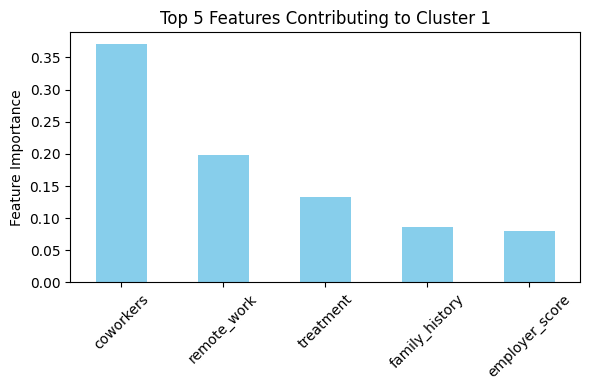

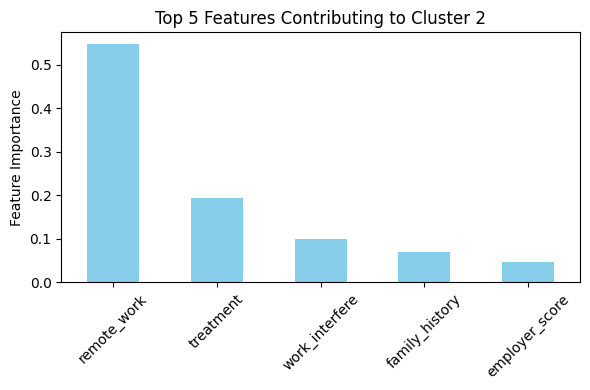

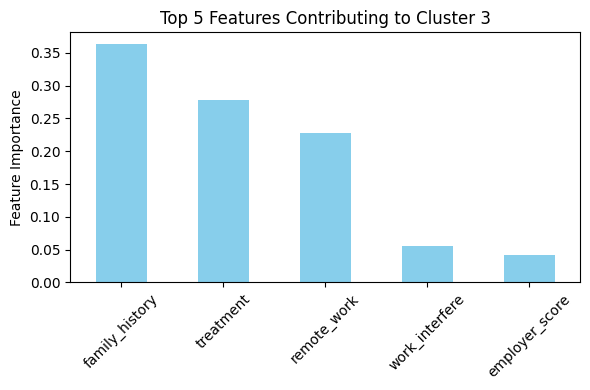

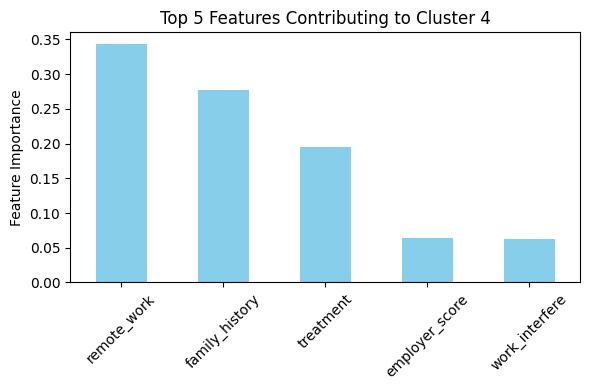

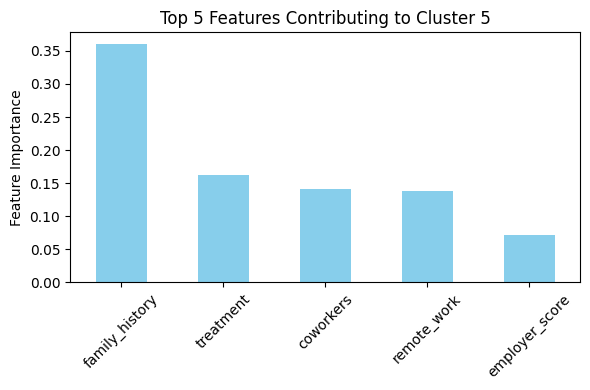

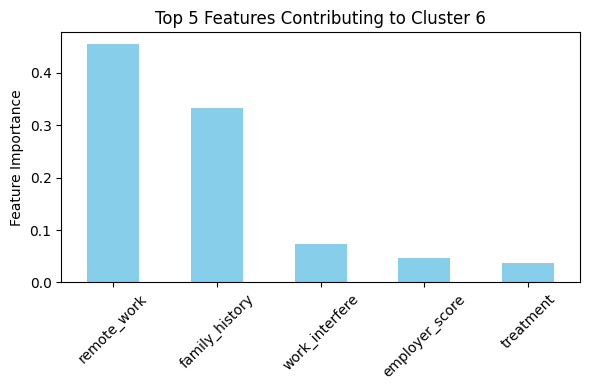

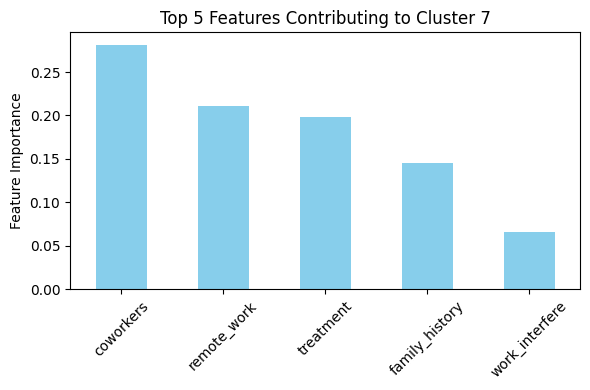

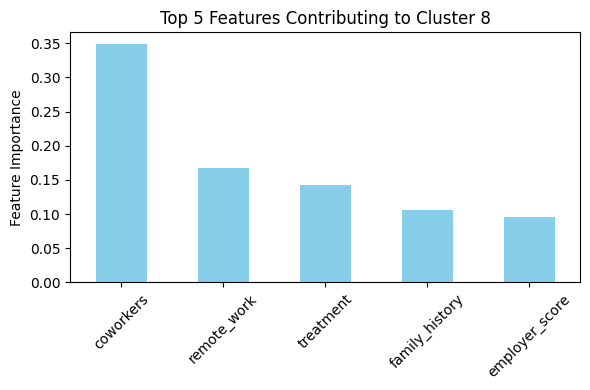

In [55]:
import matplotlib.pyplot as plt

top_n = 5

for cluster_id, importance in cluster_feature_importance.items():
    top_features = importance.head(top_n)

    plt.figure(figsize=(6, 4))
    top_features.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Features Contributing to Cluster {cluster_id}')
    plt.ylabel('Feature Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Clusters Name in layperson's term**



Cluster 0: "Hereditary Silent Sufferers"

This group likely has a family history of mental health issues and works remotely, possibly isolating them further. They do seek treatment, but the cluster doesn't show strong interaction with coworkers or interference at work.



Cluster 1: "Vocal Workplace Advocates"

This group is significantly shaped by coworker interactions. They may be more open or influenced by work culture around mental health.



Cluster 2: "Remote Resilients"

They are primarily remote workers, and while some seek treatment, they experience interference with work.




Cluster 3: "Genetic Warriors"


With a strong genetic predisposition, these individuals are actively treating their condition. They also work remotely.



Cluster 4: "Remote-Aware Responders"

This group also works remotely and has some hereditary links. They're more aware of their mental health and do seek treatment.



Cluster 5: "Quiet Carriers"

This group has family history but moderate interaction with coworkers and treatment.



Cluster 6: "Isolated Inheritors"

High remote work and family history, but very low treatment.



Cluster 7: "Empathetic Collaborators"

They’re emotionally open to coworkers, take treatment, and likely find support in their network.



Cluster 8: "Workplace Seekers"

This group is deeply shaped by interactions at work, and also values the employer's role in mental health support.